In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd

In [ ]:
poland = gpd.read_file('https://www.gis-support.pl/downloads/2022/powiaty.zip')
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colormap
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'orange'])

# Define boundaries or specific values for the groups
boundaries = [0, 100, 200, 300, 400]

# Normalize the data based on the boundaries
norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)

# Plot the map with the custom colormap and the normalized data
poland.plot(ax=ax, column='JPT_POWIER', cmap=cmap, norm=norm, legend=True)

plt.show()

In [2]:
mapping_path = "/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/results/FINAL TABLE - mapping.csv"
final_group_path = "/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/results/FINAL_GROUPS.csv"

In [4]:
mapping_df = pd.read_csv(mapping_path)
final_df = pd.read_csv(final_group_path)

In [7]:
final_df_copy  = final_df.copy()

In [9]:
final_df_copy

,powiat_numer,year,sum_expected,population,expected_cmr,group,intercept,a1,a2,median_age,woj_numer,delta,root1,root2,minimum,increase_point,median_age_group,faze1,faze2
0,201,2020,1007.966774,90249,1116.873067,1,210.001430,-98.070809,7.895321,42.1,2,2985.768710,2.750276,9.671108,NaN,10,7,3,1
1,201,2021,1013.046784,89987,1125.770149,1,425.079594,-209.041391,18.170579,42.4,2,12802.534661,2.638692,8.865697,NaN,9,7,3,3
2,202,2020,1327.309761,100636,1318.921421,3,233.322023,-109.368099,10.259752,44.8,2,2386.076905,2.949419,7.710498,NaN,8,8,1,1
3,202,2021,1307.363617,99524,1313.616431,3,183.515085,-121.288677,13.905175,45.1,2,4503.705714,1.948160,6.774396,NaN,7,8,2,1
4,203,2020,905.912740,88034,1029.048709,1,526.090197,-257.939783,21.535247,42.5,2,21215.001754,2.607030,9.370533,NaN,9,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,3261,2021,1159.387526,107693,1076.567210,1,199.012288,-111.824230,12.055750,44.1,32,2907.689039,2.401395,6.874198,NaN,7,7,1,1
752,3262,2020,5027.889656,407476,1233.910624,3,150.260756,-72.821724,6.526380,43.0,32,1380.368089,2.732634,8.425423,NaN,8,7,3,2
753,3262,2021,5030.209567,404625,1243.178145,3,222.630294,-115.982662,11.888074,43.3,32,2865.395905,2.626719,7.129500,NaN,7,7,1,1
754,3263,2020,532.415483,41140,1294.155281,3,31.964163,-10.898814,-0.581740,45.8,32,193.163525,2.578052,-21.312897,NaN,3,8,2,2


In [16]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Group   27 non-null     int64 
 1   faze1   27 non-null     int64 
 2   faze2   27 non-null     int64 
 3   key     27 non-null     int64 
 4   Color   27 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


In [14]:
final_df_copy['key'] = 100*final_df_copy['group'] + 10*final_df_copy['faze1'] + final_df_copy['faze2']

In [21]:
df = pd.merge(final_df_copy[['powiat_numer', 'year', 'group', 'faze1', 'faze2', 'key']], mapping_df, on = "key")

In [22]:
df

,powiat_numer,year,group,faze1_x,faze2_x,key,Group,faze1_y,faze2_y,Color
0,201,2020,1,3,1,131,1,3,1,#6aa84f
1,203,2021,1,3,1,131,1,3,1,#6aa84f
2,209,2020,1,3,1,131,1,3,1,#6aa84f
3,210,2020,1,3,1,131,1,3,1,#6aa84f
4,211,2020,1,3,1,131,1,3,1,#6aa84f
...,...,...,...,...,...,...,...,...,...,...
751,3021,2020,2,3,2,232,2,3,2,#38761d
752,3025,2020,2,3,2,232,2,3,2,#38761d
753,3211,2020,2,3,2,232,2,3,2,#38761d
754,2606,2020,3,1,2,312,3,1,2,#6aa84f


In [25]:
df.drop(['Group', 'faze1_y', 'faze2_y'], inplace=True, axis='columns')

In [29]:
df = df.rename(columns={'faze1_x' : 'faze1', 'faze2_x' : 'faze2'})

In [30]:
df

,powiat_numer,year,group,faze1,faze2,key,Color
0,201,2020,1,3,1,131,#6aa84f
1,203,2021,1,3,1,131,#6aa84f
2,209,2020,1,3,1,131,#6aa84f
3,210,2020,1,3,1,131,#6aa84f
4,211,2020,1,3,1,131,#6aa84f
...,...,...,...,...,...,...,...
751,3021,2020,2,3,2,232,#38761d
752,3025,2020,2,3,2,232,#38761d
753,3211,2020,2,3,2,232,#38761d
754,2606,2020,3,1,2,312,#6aa84f


In [44]:
df['powiat_numer'] = df['powiat_numer'].astype('str')

In [46]:
poland = gpd.read_file("https://www.gis-support.pl/downloads/2022/powiaty.zip")
poland["powiat_numer"] = poland["JPT_KOD_JE"].astype("int").astype("str")

In [67]:
poland_df.columns

Index(['powiat_numer', 'year', 'group', 'faze1', 'faze2', 'key', 'Color',
       'gml_id', 'JPT_SJR_KO', 'JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_',
       'JPT_ORGAN_', 'JPT_JOR_ID', 'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD',
       'WAZNY_DO', 'JPT_KOD__1', 'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_',
       'ID_BUFORA_', 'ID_BUFORA1', 'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY',
       'IIP_WERSJA', 'JPT_KJ_IIP', 'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS',
       'JPT_SPS_KO', 'ID_BUFOR_1', 'JPT_ID', 'JPT_POWI_1', 'JPT_KJ_I_3',
       'JPT_GEOMET', 'JPT_GEOM_1', 'SHAPE_LENG', 'SHAPE_AREA', 'REGON',
       'RODZAJ', 'geometry'],
      dtype='object')

In [47]:
poland_df = pd.merge(df, poland, on=["powiat_numer"])

In [65]:
poland_df.to_csv('../results/poland_df_groups.csv', index=False)

In [69]:
poland_df[['powiat_numer', 'year', 'group', 'faze1', 'faze2', 'key', 'Color', 'JPT_NAZWA_']].to_csv('../results/poland_df_groups.csv', index=False)

In [83]:
poland_df_simple = poland_df[['powiat_numer', 'year', 'group', 'faze1', 'faze2', 'key', 'Color', 'JPT_NAZWA_']]

poland_df_cp= poland_df_simple.copy()

In [84]:
(poland_df_simple['powiat_numer'].astype('int')/100).astype(str).str.split('.')

0       [2, 01]
1       [2, 01]
2       [2, 03]
3       [2, 03]
4       [2, 09]
         ...   
751    [30, 25]
752     [20, 1]
753     [20, 1]
754    [26, 11]
755    [26, 11]
Name: powiat_numer, Length: 756, dtype: object

In [85]:
poland_df_simple['woj_number'] = np.where(poland_df_simple['powiat_numer'].str.len() == 3, poland_df_simple['powiat_numer'].str[:1], poland_df_simple['powiat_numer'].str[:2])

/var/folders/0l/67tf_5_513l9yxyh2c98phcw0000gn/T/ipykernel_52272/3270709202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland_df_simple['woj_number'] = np.where(poland_df_simple['powiat_numer'].str.len() == 3, poland_df_simple['powiat_numer'].str[:1], poland_df_simple['powiat_numer'].str[:2])


In [86]:
poland_df_simple

,powiat_numer,year,group,faze1,faze2,key,Color,JPT_NAZWA_,woj_number
0,201,2020,1,3,1,131,#6aa84f,powiat bolesławiecki,2
1,201,2021,1,3,3,133,#6aa84f,powiat bolesławiecki,2
2,203,2021,1,3,1,131,#6aa84f,powiat głogowski,2
3,203,2020,1,3,3,133,#6aa84f,powiat głogowski,2
4,209,2020,1,3,1,131,#6aa84f,powiat legnicki,2
...,...,...,...,...,...,...,...,...,...
751,3025,2020,2,3,2,232,#38761d,powiat średzki,30
752,2010,2020,3,1,3,313,#fbbd05,powiat siemiatycki,20
753,2010,2021,3,1,3,313,#fbbd05,powiat siemiatycki,20
754,2611,2020,3,1,3,313,#fbbd05,powiat starachowicki,26


In [87]:
hospitals = pd.read_csv('../../population_data/other-measures/hospitals.csv')


In [88]:
hospitals

,id,name,year,value,woj_numer
0,11200000000,MAŁOPOLSKIE,2004,73,12
1,11200000000,MAŁOPOLSKIE,2005,75,12
2,11200000000,MAŁOPOLSKIE,2006,61,12
3,11200000000,MAŁOPOLSKIE,2007,63,12
4,11200000000,MAŁOPOLSKIE,2008,61,12
...,...,...,...,...,...
283,71400000000,MAZOWIECKIE,2017,118,14
284,71400000000,MAZOWIECKIE,2018,121,14
285,71400000000,MAZOWIECKIE,2019,112,14
286,71400000000,MAZOWIECKIE,2020,118,14


In [89]:
woj_df = hospitals[['name', 'woj_numer']].drop_duplicates()

In [92]:
woj_df = woj_df.rename(columns={'woj_numer' : 'woj_number'})

In [98]:
woj_df

,name,woj_number
0,MAŁOPOLSKIE,12
18,ŚLĄSKIE,24
36,LUBUSKIE,8
54,WIELKOPOLSKIE,30
72,ZACHODNIOPOMORSKIE,32
90,DOLNOŚLĄSKIE,2
108,OPOLSKIE,16
126,KUJAWSKO-POMORSKIE,4
144,POMORSKIE,22
162,WARMIŃSKO-MAZURSKIE,28


In [93]:
woj_df['woj_number'] = woj_df['woj_number'].astype('str')

In [94]:
poland_woj = pd.merge(poland_df_simple, woj_df, how='left', on = 'woj_number')

In [95]:
poland_woj

,powiat_numer,year,group,faze1,faze2,key,Color,JPT_NAZWA_,woj_number,name
0,201,2020,1,3,1,131,#6aa84f,powiat bolesławiecki,2,DOLNOŚLĄSKIE
1,201,2021,1,3,3,133,#6aa84f,powiat bolesławiecki,2,DOLNOŚLĄSKIE
2,203,2021,1,3,1,131,#6aa84f,powiat głogowski,2,DOLNOŚLĄSKIE
3,203,2020,1,3,3,133,#6aa84f,powiat głogowski,2,DOLNOŚLĄSKIE
4,209,2020,1,3,1,131,#6aa84f,powiat legnicki,2,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...,...
751,3025,2020,2,3,2,232,#38761d,powiat średzki,30,WIELKOPOLSKIE
752,2010,2020,3,1,3,313,#fbbd05,powiat siemiatycki,20,PODLASKIE
753,2010,2021,3,1,3,313,#fbbd05,powiat siemiatycki,20,PODLASKIE
754,2611,2020,3,1,3,313,#fbbd05,powiat starachowicki,26,ŚWIĘTOKRZYSKIE


In [96]:
poland_woj.rename(columns={'JPT_NAZWA_':'Powiat', 'name' : 'Województwo'})

,powiat_numer,year,group,faze1,faze2,key,Color,Powiat,woj_number,Województwo
0,201,2020,1,3,1,131,#6aa84f,powiat bolesławiecki,2,DOLNOŚLĄSKIE
1,201,2021,1,3,3,133,#6aa84f,powiat bolesławiecki,2,DOLNOŚLĄSKIE
2,203,2021,1,3,1,131,#6aa84f,powiat głogowski,2,DOLNOŚLĄSKIE
3,203,2020,1,3,3,133,#6aa84f,powiat głogowski,2,DOLNOŚLĄSKIE
4,209,2020,1,3,1,131,#6aa84f,powiat legnicki,2,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...,...
751,3025,2020,2,3,2,232,#38761d,powiat średzki,30,WIELKOPOLSKIE
752,2010,2020,3,1,3,313,#fbbd05,powiat siemiatycki,20,PODLASKIE
753,2010,2021,3,1,3,313,#fbbd05,powiat siemiatycki,20,PODLASKIE
754,2611,2020,3,1,3,313,#fbbd05,powiat starachowicki,26,ŚWIĘTOKRZYSKIE


In [97]:
poland_woj.to_csv('../results/powiats_to_paper.csv', index=False)

### Mapka dla 2020

In [49]:
df_2020 = poland_df.query("year == 2020")

In [54]:
df_2020 =  gpd.GeoDataFrame(df_2020)

In [50]:
df_2020

,powiat_numer,year,group,faze1,faze2,key,Color,gml_id,JPT_SJR_KO,JPT_POWIER,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,201,2020,1,3,1,131,#6aa84f,NaN,POW,130386,...,1361679,0,NaN,0,0,2.85878211456,.16812415183,23082162900000,powiat,"POLYGON ((250582.472 412431.032, 250591.655 41..."
3,203,2020,1,3,3,133,#6aa84f,NaN,POW,44326,...,829319,0,NaN,0,0,2.08474100874,.05759524697,39064721600000,powiat,"POLYGON ((292025.727 412185.228, 291923.883 41..."
4,209,2020,1,3,1,131,#6aa84f,NaN,POW,74385,...,1365023,0,NaN,0,0,3.24477586245,.09575164723,39064720000000,powiat,"POLYGON ((304477.962 363650.836, 304441.837 36..."
6,210,2020,1,3,1,131,#6aa84f,NaN,POW,42831,...,1365072,0,NaN,0,0,1.7325861167,.05493809745,23082137400000,powiat,"POLYGON ((239131.442 343873.914, 239066.074 34..."
8,211,2020,1,3,1,131,#6aa84f,NaN,POW,71162,...,829327,0,NaN,0,0,2.00436101947,.09195296248,39064722200000,powiat,"POLYGON ((304562.111 402678.643, 304560.779 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,3008,2020,2,3,3,233,#b7d7a8,NaN,POW,60793,...,829179,0,NaN,0,0,1.86340740132,.07829751366,25085467100000,powiat,"POLYGON ((423807.420 387515.892, 423811.193 38..."
748,3013,2020,2,3,3,233,#b7d7a8,NaN,POW,80691,...,1362982,0,NaN,0,0,2.92447620801,.10515626961,41105045100000,powiat,"POLYGON ((326848.850 457382.090, 327036.150 45..."
751,3025,2020,2,3,2,232,#38761d,NaN,POW,62356,...,1350693,0,NaN,0,0,2.11514202038,.081810432,63125795700000,powiat,"POLYGON ((394117.803 464090.388, 394140.479 46..."
752,2010,2020,3,1,3,313,#fbbd05,NaN,POW,145756,...,1364003,0,NaN,0,0,2.86921706566,.19306276941,05065861100000,powiat,"POLYGON ((792998.056 515609.172, 793053.194 51..."


In [40]:
# # Drop duplicates based on 'group' and 'color' columns
# df_unique = df.drop_duplicates(subset=['key', 'Color'])

# # Create a dictionary from the 'group' and 'color' columns
# group_colors = pd.Series(df_unique['Color'].values, index=df_unique['key']).to_dict()

# print(group_colors[113])


#6aa84f


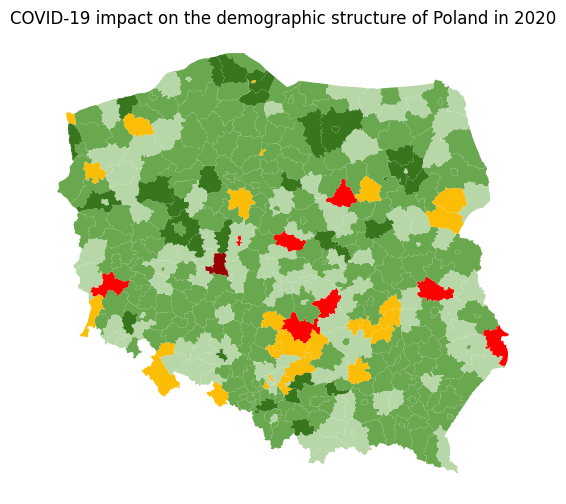

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
df_2020.plot(ax=ax, color=df_2020['Color'], legend=True)
ax.set_title('COVID-19 impact on the demographic structure of Poland in 2020')
ax.set_axis_off()
plt.show()

### Wykres 2021

In [58]:
df_2021 = poland_df.query("year == 2021")

In [59]:
df_2021 =  gpd.GeoDataFrame(df_2021)

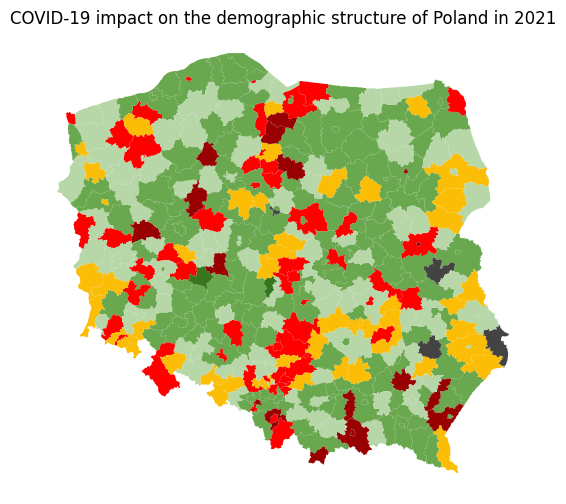

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
df_2021.plot(ax=ax, color=df_2021['Color'], legend=True)
ax.set_title('COVID-19 impact on the demographic structure of Poland in 2021')
ax.set_axis_off()
plt.show()

In [102]:
df2 = pd.read_csv('../results/tab_final.csv')
df2 = df2.rename(columns={'Diff':'diff_keys'})
df2['diff_keys'] = df2['diff_keys'].astype('str')

In [108]:
diff_keys = ['-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4']
diff_colors = [
'#990001',
'#cc0100',
'#e06666',
'#ea9999',
'#f5cbcc',
'#ffffff',
'#d9ead3',
'#93c47d',
'#6aa84f',
'#38761d']
data = {
    'diff_keys': diff_keys,
    'diff_colors': diff_colors
}

diff_df = pd.DataFrame(data)

In [111]:
diff_df['diff_keys'] = diff_df['diff_keys'].astype('str')

In [113]:
df2

,powiat_numer,year,group,faze1,faze2,key,Color,JPT_NAZWA_,color,diff_keys
0,201,2021,1,3,3,133,#6aa84f,powiat bolesławiecki,2,0
1,203,2020,1,3,3,133,#6aa84f,powiat głogowski,2,0
2,209,2021,1,2,2,122,#b7d7a8,powiat legnicki,3,-1
3,210,2021,1,2,2,122,#b7d7a8,powiat lubański,3,-1
4,211,2021,1,3,3,133,#6aa84f,powiat lubiński,2,0
...,...,...,...,...,...,...,...,...,...,...
373,3008,2021,2,3,3,233,#b7d7a8,powiat kępiński,3,0
374,3013,2021,2,3,3,233,#b7d7a8,powiat leszczyński,3,0
375,3025,2020,2,3,2,232,#38761d,powiat średzki,1,2
376,2010,2021,3,1,3,313,#fbbd05,powiat siemiatycki,4,0


In [114]:
diff = pd.merge(df2, diff_df, on='diff_keys')

In [115]:
diff

,powiat_numer,year,group,faze1,faze2,key,Color,JPT_NAZWA_,color,diff_keys,diff_colors
0,201,2021,1,3,3,133,#6aa84f,powiat bolesławiecki,2,0,#ffffff
1,203,2020,1,3,3,133,#6aa84f,powiat głogowski,2,0,#ffffff
2,211,2021,1,3,3,133,#6aa84f,powiat lubiński,2,0,#ffffff
3,213,2020,1,1,1,111,#6aa84f,powiat milicki,2,0,#ffffff
4,219,2021,1,1,1,111,#6aa84f,powiat świdnicki,2,0,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...
373,1262,2020,2,3,3,233,#b7d7a8,powiat Nowy Sącz,3,3,#6aa84f
374,1464,2020,2,3,3,233,#b7d7a8,powiat Siedlce,3,3,#6aa84f
375,2062,2020,2,3,3,233,#b7d7a8,powiat Łomża,3,3,#6aa84f
376,3028,2020,2,3,3,233,#b7d7a8,powiat wągrowiecki,3,3,#6aa84f


In [118]:
diff['powiat_numer'] = diff['powiat_numer'].astype('str')

In [119]:
poland_df = pd.merge(diff, poland, on=["powiat_numer"])
poland_geo = gpd.GeoDataFrame(poland_df)

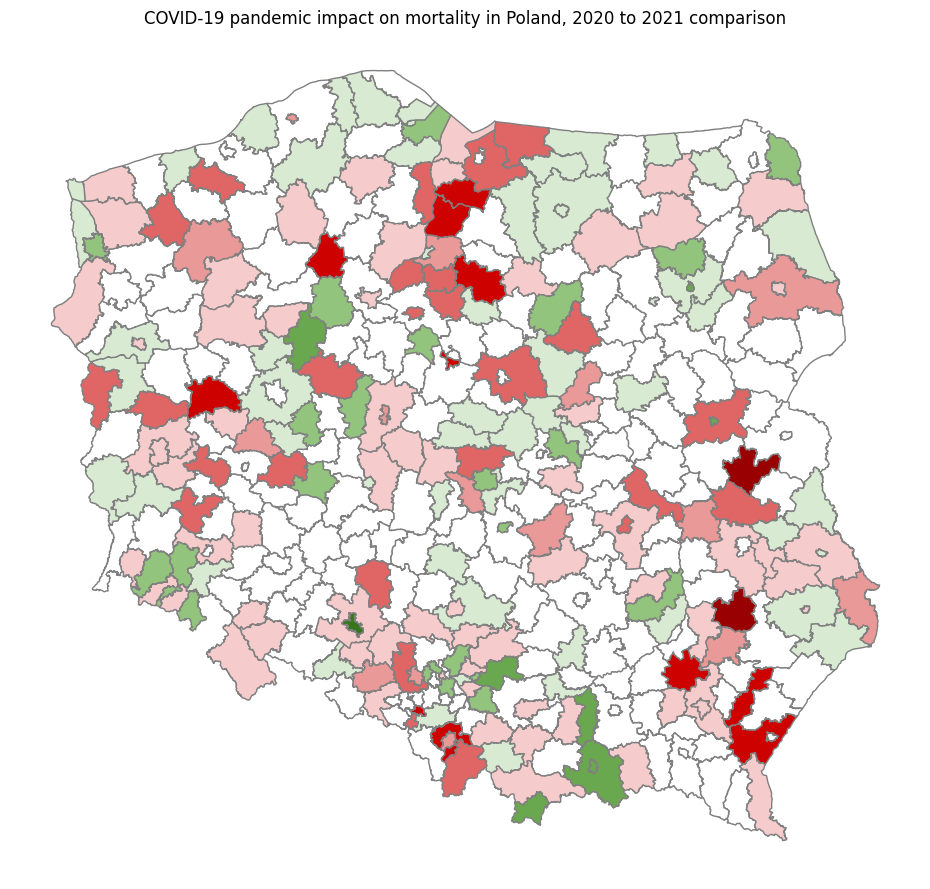

In [126]:
fig, ax = plt.subplots(figsize=(15, 11))
poland_geo.plot(ax=ax, color=poland_geo['diff_colors'], edgecolor='gray', legend=True)
ax.set_title('COVID-19 pandemic impact on mortality in Poland, 2020 to 2021 comparison')
ax.set_axis_off()
plt.show()

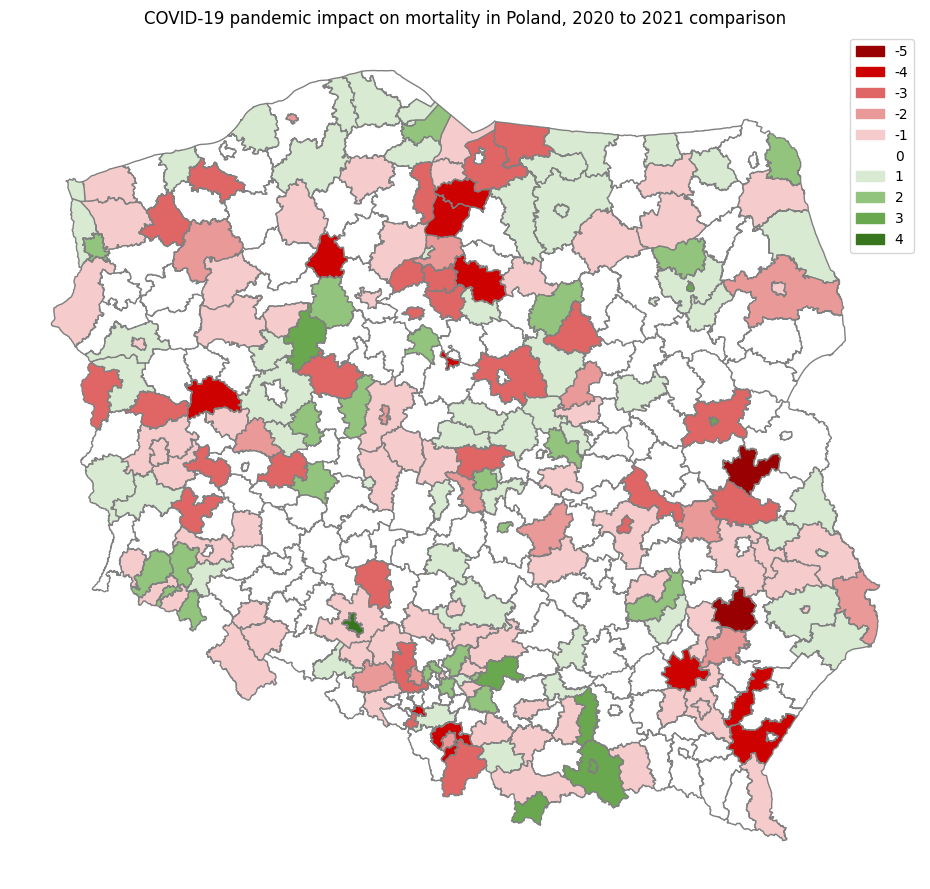

In [133]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15, 11))
poland_geo.plot(ax=ax, color=poland_geo['diff_colors'], edgecolor='gray')

# Create a dictionary with categories and corresponding colors
category_colors = {
    '-5': '#990001',
    '-4': '#cc0100',
    '-3': '#e06666',
    '-2': '#ea9999',
    '-1': '#f5cbcc',
    '0': '#ffffff',
    '1': '#d9ead3',
    '2': '#93c47d',
    '3': '#6aa84f',
    '4': '#38761d'
}

# Create a list of legend elements
legend_elements = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]

# Add the legend to the plot
ax.legend(handles=legend_elements)

ax.set_title('COVID-19 pandemic impact on mortality in Poland, 2020 to 2021 comparison')
ax.set_axis_off()
plt.show()


In [132]:
data

{'diff_keys': ['-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'],
 'diff_colors': ['#990001',
  '#cc0100',
  '#e06666',
  '#ea9999',
  '#f5cbcc',
  '#ffffff',
  '#d9ead3',
  '#93c47d',
  '#6aa84f',
  '#38761d']}